In [1]:
import pandas as pd
import numpy as np
import scipy

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def get_monthly_anomalies(df):
    return df.groupby(df.index.month).transform(lambda x: x-x.mean())

In [4]:
dfd = pd.read_csv('/home/ck/DIR/cornkle/data/HUARAZ/Lorenz_NDVI/monthly_ndvi_chirps.csv',index_col=0,parse_dates=True)

In [5]:
dfd

,precipitation,NDVI
time,,
2000-02-01,83.080200,0.546496
2000-03-01,137.222400,0.514255
2000-04-01,76.105194,0.528861
2000-05-01,32.398140,0.488823
2000-06-01,2.924757,0.407758
...,...,...
2020-04-01,49.087990,0.508942
2020-05-01,26.185253,0.474645
2020-06-01,3.884238,0.414027


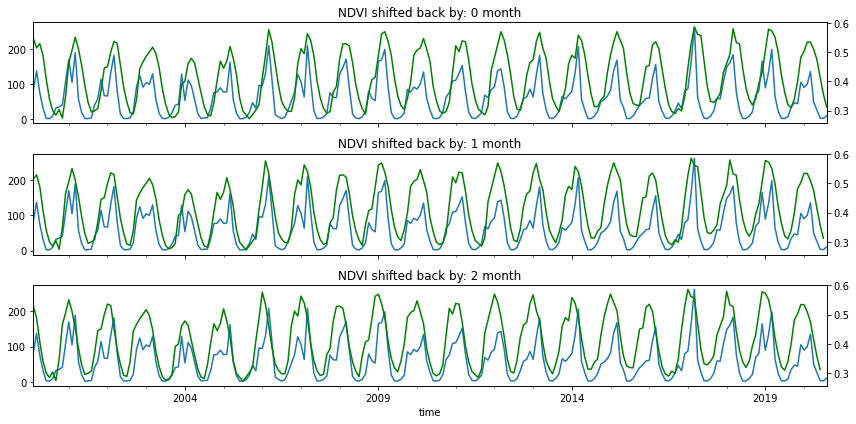

In [6]:
fig,axs = plt.subplots(3,figsize=(12,6))
for i,ax in enumerate(axs):
    ay = ax.twinx()
    #plot 
    dfd['precipitation'].plot(ax=ax)
    dfd['NDVI'].shift(-i).plot(ax=ay,c='g')

    ax.set_title('NDVI shifted back by: '+str(i)+' month')

fig.tight_layout()

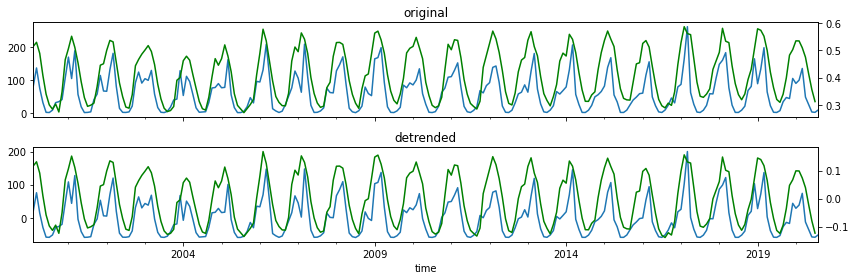

In [7]:
from scipy import signal
#detrending
dfd['NDVI_detr'] = signal.detrend(dfd['NDVI'])
dfd['prec_detr'] = signal.detrend(dfd['precipitation'])

fig,axs = plt.subplots(2,figsize=(12,4))
for i,ax in enumerate(axs):
    ay = ax.twinx()
    #plot 1
    if i == 0:
        dfd['NDVI'].shift(-1).plot(ax=ay,c='g')
        dfd['precipitation'].plot(ax=ax)
        ax.set_title('original')
    else:
        dfd['NDVI_detr'].shift(-1).plot(ax=ay,c='g')
        dfd['prec_detr'].plot(ax=ax)
        ax.set_title('detrended')



fig.tight_layout()

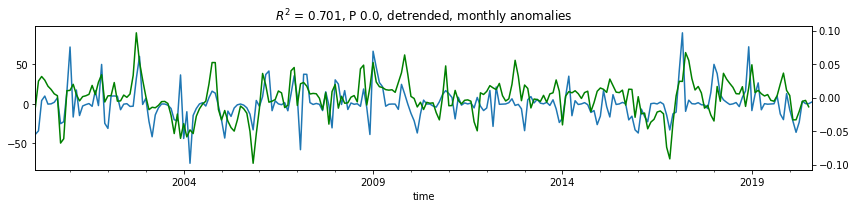

In [8]:
from scipy import signal
#detrending


fig,ax = plt.subplots(figsize=(12,3))
ay = ax.twinx()

get_monthly_anomalies(dfd['prec_detr']).plot(ax=ax)
get_monthly_anomalies(dfd['NDVI_detr'].shift(-1)).plot(ax=ay,c='g')

r, p = scipy.stats.pearsonr(dfd['NDVI_detr'].shift(-1).iloc[:-1], dfd['prec_detr'].iloc[:-1])

ax.set_title(f"$R^2$ = {np.round(r**2,3)}, P {np.round(p,5)}, detrended, monthly anomalies")



fig.tight_layout()